## Chapter 3 problems

In [1]:
from sympy import *
init_printing()

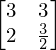

In [2]:
A = Matrix([
[3,     3],
[2, S(3)/2]])
A

In [3]:
b = Matrix([6,5])

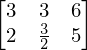

In [4]:
AUG = A.row_join(b)
AUG # the augmented matrix

### Alice

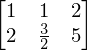

In [5]:
AUGA = AUG.copy()
AUGA[0,:] = AUGA[0,:]/3
AUGA

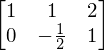

In [6]:
AUGA[1,:] = AUGA[1,:] - 2*AUGA[0,:]
AUGA

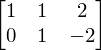

In [7]:
AUGA[1,:] = -2*AUGA[1,:]
AUGA

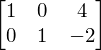

In [8]:
AUGA[0,:] = AUGA[0,:] - AUGA[1,:]
AUGA

### Bob

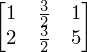

In [9]:
AUGB = AUG.copy()
AUGB[0,:] = AUGB[0,:] - AUGB[1,:]
AUGB

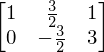

In [10]:
AUGB[1,:] = AUGB[1,:] - 2*AUGB[0,:]
AUGB

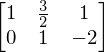

In [11]:
AUGB[1,:] = -1*S(2)/3*AUGB[1,:]
AUGB

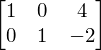

In [12]:
AUGB[0,:] = AUGB[0,:] - S(3)/2*AUGB[1,:]
AUGB

### Charlotte

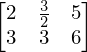

In [13]:
AUGC = AUG.copy()
AUGC[0,:], AUGC[1,:] = AUGC[1,:], AUGC[0,:]
AUGC

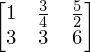

In [14]:
AUGC[0,:] = AUGC[0,:]/2
AUGC

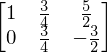

In [15]:
AUGC[1,:] = AUGC[1,:] - 3*AUGC[0,:]
AUGC

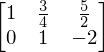

In [16]:
AUGC[1,:] = S(4)/3*AUGC[1,:]
AUGC

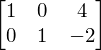

In [17]:
AUGC[0,:] = AUGC[0,:] - S(3)/4*AUGC[1,:]
AUGC

### P3.3

In [18]:
# define agmented matrices for three systems of eqns. with unique sol'ns
A = Matrix([
        [ -1, -2, -2],
        [  3, 3, 0]])
        
B = Matrix([
        [ 1, -1, -2,  1],
        [-2,  3,  3, -1],
        [-1,  0,  1,  2]])

C = Matrix([
        [ 2, -2,  3, 2],
        [ 1, -2, -1, 0],
        [-2,  2,  2, 1]])


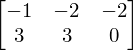

In [19]:
A

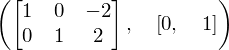

In [20]:
A.rref()

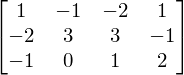

In [21]:
B

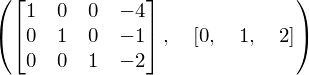

In [22]:
B.rref()

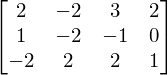

In [23]:
C

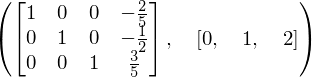

In [24]:
C.rref()

### P3.4

In [25]:
# now for three systems of eqns. with infinitely many sol'ns
D = Matrix([
        [ -1, -2, -2],
        [  3, 6,   6]])
        
E = Matrix([
        [ 1, -1, -2,  1],
        [-2,  3,  3, -1],
        [-1,  2,  1,  0]])

F = Matrix([
        [ 2, -2, 3, 2],
        [ 0,  0, 5, 3],
        [-2,  2, 2, 1]])

### Solving d)

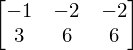

In [26]:
D

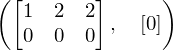

In [27]:
D.rref()

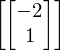

In [28]:
D[0:2,0:2].nullspace()

In [29]:
# the solutions to the sytem of equations represented by D
# is of the form    point + nullspace
point = D.rref()[0][:,2]
nullspace = D[0:2,0:2].nullspace()

In [30]:
# the point is also called he particular solution
point

True


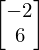

In [31]:
# if A aug matrix is [A|b], then the point satisfies A*point = b.
print( D[0:2,0:2]*point == D[:,2] )
D[0:2,0:2]*point

### Null space

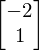

In [32]:
# the nullspace of A in aug. matrix [A|b] is one dimensional and spanned by
n = nullspace[0]
n
# every vector n in the nullspace of A satisfies  A*n=0

In [33]:
# so solution to A*x=b is any (point+s*n) where s is any real number
# since  A*(point +s*n) = A*point + sA*n = A*point + 0 = b.
# verify claim for 20 values of s in range -5,-4,-3,-2,-1,0,1,2,3,4,5
for s in range(-5,6):
    print( D[0:2,0:2]*(point + s*n), 
           D[0:2,0:2]*(point + s*n) == D[:,2] )

Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True
Matrix([[-2], [6]]) True


### Solving e)

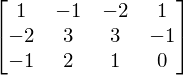

In [34]:
E

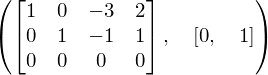

In [35]:
E.rref()

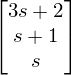

In [36]:
point_E = E.rref()[0][:,3]
nullspace_E = E[0:3,0:3].nullspace()[0]
s = symbols('s')
point_E + s*nullspace_E

### Solving f)

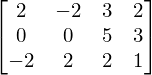

In [37]:
F

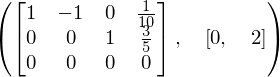

In [38]:
F.rref()

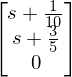

In [39]:
point_F = F.rref()[0][:,3]
nullspace_F = F[0:3,0:3].nullspace()[0]
s = symbols('s')
point_F + s*nullspace_F